# scikit-learn example on text classification
http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html


## First let's load data
The data is from newspapers articles and they have around 20 labels
Every file is an article and they are saved in their folder with the name of the label (Category)



In [1]:
from sklearn.datasets import fetch_20newsgroups

Exmining the function we can see that we can pass a list to pull specific categories so we dont overload the computer. I will select the sugested labels on the exercise to keep up with the tutorial

In [ ]:
fetch_20newsgroups?

In [4]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [6]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [7]:
type(twenty_train)

sklearn.datasets.base.Bunch

In [8]:
dir(twenty_train)

['DESCR', 'data', 'description', 'filenames', 'target', 'target_names']

## Let's try to get a good understanding on what that data is and looks like

In [19]:
print(twenty_train.data[0])

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [21]:
print('target: ' + str(twenty_train.target[0]) + 
      '\ntarget_names: ' + str(twenty_train.target_names[twenty_train.target[0]]) + 
      '\nfilenames: ' + str(twenty_train.filenames[twenty_train.target[0]]))

target: 1
target_names: comp.graphics
filenames: /Users/races/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38479


### Now, we need to tokenize all the words in the documents using bag of words that come with scikit-lear. This matrix is highly sparse given each position represent a unique word

The way it works is by creating a tranformer object >> training it >> applying it to dataset 
Of course this would mean that we need to apply the same transformer to the test set of any other set (or record) that will be scored

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

In [103]:
len(count_vect.get_feature_names())

35788

In [65]:
X_train_counts[0].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [32]:
CountVectorizer?

#### This will return the position of any word from the mapping

In [36]:
count_vect.vocabulary_.get(u'algorithm')

4690

We should nornmalize the data as some documents are bigger than others. Let's look at the frequency of words per document

In [59]:
%matplotlib
import matplotlib.pyplot as plt

Using matplotlib backend: MacOSX


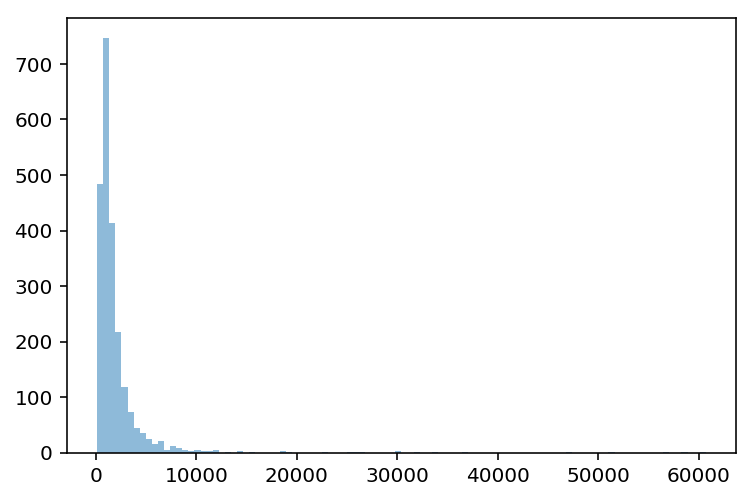

In [61]:
docs_size = [len(x) for x in twenty_train.data]
hist_plt = plt.hist(docs_size, bins = 100, alpha = 0.5)

### tf-idf

We can see the data is highly skewed. So what we can do is to use word frequency instead of word count. **tf** stands for Term Frequency, it divides the occurrences of each words by the total number of words in the document. Another process usually used in word-document tokenization is **th-idf** which stands for Term Frequency Inverse Document Frequency which downscale the importance of words appearing in many documents that might not really have a special weight on clasifying a document.

In [62]:
from sklearn.feature_extraction.text import TfidfTransformer

Just as we did before, we need to create a transformer object with fit_transform.

Notice shape did not change as the change should be seen within each vector.

In [66]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 35788)

In [68]:
tfidf_transformer.get_params()

{'norm': 'l2', 'smooth_idf': True, 'sublinear_tf': False, 'use_idf': True}

In [104]:
# Take a look ah how the words got transformed
count_list = X_train_counts.todense()[0].tolist()
transformed_list = X_train_tfidf.todense()[0].tolist()
for i, (count, t_count) in enumerate(zip(count_list[0], transformed_list[0])):
    if count > 0:
        print(count_vect.get_feature_names()[i] + ' : ' + str(count) + ' : ' + str(t_count))

071 : 2 : 0.25612026239119895
0hb : 1 : 0.1348710554299733
14 : 1 : 0.05966162012870271
477 : 2 : 0.24645540709354397
8000 : 1 : 0.10783602957370853
8565 : 1 : 0.1348710554299733
ac : 2 : 0.12491817585060791
advance : 1 : 0.0686611288079694
also : 1 : 0.03900412426100995
any : 1 : 0.0310951485922154
anyone : 1 : 0.04316199700711876
application : 1 : 0.08413454409085573
city : 4 : 0.314400065528974
collier : 3 : 0.3841803935867984
computer : 1 : 0.049671845493333165
convert : 1 : 0.07830787326179856
converting : 2 : 0.21567205914741705
correct : 1 : 0.06350565647195339
do : 1 : 0.031042954435189937
does : 1 : 0.037793189755988436
ec1v : 1 : 0.1348710554299733
email : 2 : 0.125601499991304
fax : 1 : 0.06666452137859726
files : 2 : 0.13635772403701527
format : 1 : 0.07691883385947053
from : 1 : 0.016797806021219684
good : 1 : 0.042703686357211466
group : 1 : 0.05417404179868691
hampton : 1 : 0.11382738609462074
host : 1 : 0.0360441471878483
hp : 2 : 0.17358472047671197
hpgl : 1 : 0.123227

In [106]:
# as reminder, this is the document
print(twenty_train.data[0])

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [87]:
len(X_train_tfidf.todense()[0].tolist())

1

### Now, we have to create a classifier for our vectorized words. We will be using aaive - Bayes multinomial
For more information, please check documentation: http://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes
As mentioned in documentation, naives_bayes tends to be a classifer but a really bad estimator. So, do **NOT** take too seriously the estimation of the prediction.

In [107]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

Notice how we need to use the same tranformer created above **tfidf_transformer** but only with transfor as the vector / mapping was already trained from all the first documents

In [108]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


##  Building a Pipeline
scikit learn bring a pipeline object that let us do all in a single line. For instance, all we did above coud be translated to vectorizer >> tranformer >> classifier. See, how easy is to do with pipeline:

In [109]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', MultinomialNB()),
                    ])

Now, we can apply to our data easily:

In [111]:
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

In [117]:
# Information about the pipeline object details could be pulled
text_clf.steps

[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
          dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_range=(1, 1), preprocessor=None, stop_words=None,
          strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
          tokenizer=None, vocabulary=None)),
 ('tfidf',
  TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)),
 ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

### Let's test accuracy in the test data

In [118]:
import numpy as np

# the twenty_test object was pulled at the beginning of this document
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
# predicted == twenty_test.target will be 1 for match and 0 for non-matched. numpy mean will return average
np.mean(predicted == twenty_test.target)  

0.83488681757656458

** Support Vector Machine ** http://scikit-learn.org/stable/modules/svm.html#svm

** With Stocastic Gradient Descent ** http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

In [120]:
SGDClassifier?

In [119]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, n_iter=5, random_state=42)),
                    ])
_ = text_clf.fit(twenty_train.data, twenty_train.target)
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.9127829560585885

The underscore (_) means previous output. So in this case it just mthe same as text_clf = ...

### Using sklearn Metrics
A more through metric output could be achieve by using metrics from sklearn

In [122]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted,
        target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.95      0.81      0.87       319
         comp.graphics       0.88      0.97      0.92       389
               sci.med       0.94      0.90      0.92       396
soc.religion.christian       0.90      0.95      0.93       398

           avg / total       0.92      0.91      0.91      1502



In [123]:
print(metrics.confusion_matrix(twenty_test.target, predicted))

[[258  11  15  35]
 [  4 379   3   3]
 [  5  33 355   3]
 [  5  10   4 379]]


### Using Grid Search for Parameter Tuning
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [125]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3),
             }

In [126]:
parameters

{'clf__alpha': (0.01, 0.001),
 'tfidf__use_idf': (True, False),
 'vect__ngram_range': [(1, 1), (1, 2)]}

Using n_jobs = -1 will detect how many cores are available and use them all. By default, only 1 is used but since grid search is so expensive, it's usually recommended to use all the cores availables

In [127]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)

In [137]:
gs_clf = gs_clf.fit(twenty_train.data, twenty_train.target)
# gs_clf = gs_clf.fit(twenty_train.data[:1000], twenty_train.target[:1000])

In [138]:
# predicting a value
twenty_train.target_names[gs_clf.predict(['God is love'])[0]]

'soc.religion.christian'

In [139]:
# selected parameters
gs_clf.best_params_

{'clf__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}

In [140]:
# best scores
gs_clf.best_score_

0.96544085068675234

In [141]:
# comprehensive results of the grid search
gs_clf.cv_results_

{'mean_fit_time': array([ 1.28004424,  4.57974402,  1.16929062,  4.81641507,  1.38312157,
         7.21937847,  1.97726496,  5.93313138]),
 'mean_score_time': array([ 0.54371667,  1.42138028,  0.52358071,  1.47971567,  0.6774567 ,
         2.06567589,  0.98832432,  1.5481627 ]),
 'mean_test_score': array([ 0.90429774,  0.92113425,  0.81302614,  0.83562251,  0.96544085,
         0.95968099,  0.92157732,  0.9308817 ]),
 'mean_train_score': array([ 0.94882792,  0.97806822,  0.86131773,  0.88147852,  0.99822783,
         0.99889243,  0.97230728,  0.98515748]),
 'param_clf__alpha': masked_array(data = [0.01 0.01 0.01 0.01 0.001 0.001 0.001 0.001],
              mask = [False False False False False False False False],
        fill_value = ?),
 'param_tfidf__use_idf': masked_array(data = [True True False False True True False False],
              mask = [False False False False False False False False],
        fill_value = ?),
 'param_vect__ngram_range': masked_array(data = [(1, 1) (1, 2) 

In [142]:
# or using pandas
import pandas as pd 
gs_results = pd.DataFrame(gs_clf.cv_results_)
gs_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_clf__alpha,param_tfidf__use_idf,param_vect__ngram_range,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.280044,0.543717,0.904298,0.948828,0.01,True,"(1, 1)","{'clf__alpha': 0.01, 'tfidf__use_idf': True, '...",6,0.912351,0.950798,0.900398,0.951463,0.900133,0.944223,0.027064,0.016057,0.005699,0.003267
1,4.579744,1.421380,0.921134,0.978068,0.01,True,"(1, 2)","{'clf__alpha': 0.01, 'tfidf__use_idf': True, '...",5,0.930943,0.976729,0.928287,0.979388,0.904128,0.978088,0.079675,0.056973,0.012058,0.001086
2,1.169291,0.523581,0.813026,0.861318,0.01,False,"(1, 1)","{'clf__alpha': 0.01, 'tfidf__use_idf': False, ...",8,0.836653,0.869016,0.803453,0.847739,0.798935,0.867198,0.031524,0.017384,0.016819,0.009630
3,4.816415,1.479716,0.835623,0.881479,0.01,False,"(1, 2)","{'clf__alpha': 0.01, 'tfidf__use_idf': False, ...",7,0.867198,0.890293,0.819389,0.869681,0.820240,0.884462,0.126380,0.090468,0.022345,0.008675
4,1.383122,0.677457,0.965441,0.998228,0.001,True,"(1, 1)","{'clf__alpha': 0.001, 'tfidf__use_idf': True, ...",1,0.965471,0.998005,0.969456,0.998670,0.961385,0.998008,0.209781,0.114870,0.003294,0.000313
5,7.219378,2.065676,0.959681,0.998892,0.001,True,"(1, 2)","{'clf__alpha': 0.001, 'tfidf__use_idf': True, ...",2,0.962815,0.998670,0.965471,0.999335,0.950732,0.998672,0.180988,0.164785,0.006412,0.000313
6,1.977265,0.988324,0.921577,0.972307,0.001,False,"(1, 1)","{'clf__alpha': 0.001, 'tfidf__use_idf': False,...",4,0.924303,0.973404,0.917663,0.968750,0.922770,0.974768,0.361559,0.233605,0.002840,0.002576
7,5.933131,1.548163,0.930882,0.985157,0.001,False,"(1, 2)","{'clf__alpha': 0.001, 'tfidf__use_idf': False,...",3,0.934927,0.986702,0.928287,0.984043,0.929427,0.984728,0.348361,0.479720,0.002900,0.001127
